# L3: Text clustering and topic modelling

Text clustering groups documents in such a way that documents within a group are more &lsquo;similar&rsquo; to other documents in the cluster than to documents not in the cluster. The exact definition of what &lsquo;similar&rsquo; means in this context varies across applications and clustering algorithms.

In this lab you will experiment with both hard and soft clustering techniques. More specifically, in the first part you will be using the $k$-means algorithm, and in the second part you will be using a topic model based on the Latent Dirichlet Allocation (LDA).

## Hard clustering data set

The raw data for the hard clustering part of this lab is a collection of product reviews. We have preprocessed the data by tokenization and lowercasing.

In [1]:
import pandas as pd
import bz2

with bz2.open('/content/sample_data/reviews.json.bz2') as source:
    df = pd.read_json(source)

When you inspect the data frame, you can see that there are three labelled columns: `category` (the product category), `sentiment` (whether the product review was classified as &lsquo;positive&rsquo; or &lsquo;negative&rsquo; towards the product), and `text` (the space-separated text of the review).

In [2]:
print(df.head())
print(df.shape)

  category sentiment                                               text
0    music       neg  i bought this album because i loved the title ...
1    music       neg  i was misled and thought i was buying the enti...
2    books       neg  i have introduced many of my ell , high school...
3    books       pos  anything you purchase in the left behind serie...
4      dvd       pos  i loved these movies , and i cant wiat for the...
(11914, 3)


## Problem 1: K-means clustering

Your first task is to cluster the product review data using a tf–idf vectorizer and a $k$-means clusterer.

Start by doing the vectorization. In connection with vectorization, you should also filter out standard English stop words. While you could use [spaCy](https://spacy.io/) for this task, here it suffices to use the word list implemented in [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

In [3]:
import spacy
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
vectorizer = TfidfVectorizer(stop_words = "english")
reviews = vectorizer.fit_transform(df["text"])

Test your vectorization by running the following code cell:

In [5]:
reviews.shape

(11914, 46619)

If you used the English stop word list from scikit-learn, then the resulting vocabulary should have 46,619 entries.

Next, cluster the vectorized data. Before doing so, you should read the documentation of the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class, which is scikit-learn&rsquo;s implementation of the $k$-means algorithm. As you can see, this class has several parameters that you can tweak. For now, the only parameter that you will have to set is the number of clusters. We recommend that you choose $k=3$.

**Tip:** Training $k$-means models will take some time. To speed things up, you can use the `n_init` parameter to control the number of times that the clustering is re-computed with different initial values. The default value for this parameter is 10; here and in the rest of this lab, you may want to set this to a lower value.

In [6]:
# TODO: Enter code here to cluster the vectorized data
model = KMeans(n_clusters=3,n_init = 6 ).fit(reviews)
prediction = model.predict(reviews)

To sanity-check your clustering, create a bar plot with the number of documents per cluster.

Counter({0: 9384, 1: 1412, 2: 1118})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


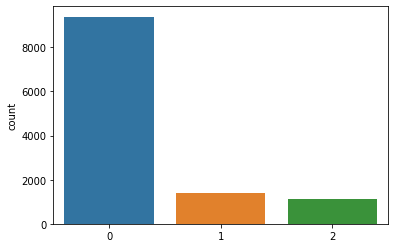

In [7]:

print(collections.Counter(prediction))
sns.countplot(prediction)

Note that sizes may vary considerable between clusters and among different random seeds.

## Problem 2: Summarize clusters

Once you have a clustering, you can try to see whether it is meaningful. One useful technique in that context is to generate a **summary** for each cluster by extracting the $n$ highest-weighted terms from the centroid of each cluster. Your next task is to implement this approach.

**Hint:** You will need to construct an &lsquo;inverted vocabulary&rsquo; that allows you to map from the index of a term back to the original term.

In [8]:
model.cluster_centers_.argsort()[:,::-1]

array([[24390, 32505, 27522, ..., 11250, 26109, 23309],
       [ 5695, 33667,  5716, ..., 20423, 20424, 46618],
       [ 6890, 24143, 31125, ..., 29580, 29579, 23309]])

In [9]:
t=vectorizer.get_feature_names_out()
t[23309]

'kippurs'

In [10]:
# source:https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster

def top_features(k,n,model):
  order_centroids = model.cluster_centers_.argsort()[:, ::-1]  # sorting the values in the reverse order
  terms = vectorizer.get_feature_names_out()                   # get the transformed features 
  for i in range(k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :n]:                           
      print(' %s' % terms[ind], end='') 
    print()

top_features(3,15,model)

Cluster 0: like product movie great just good cd album use time does did really music work
Cluster 1: book read books author reading story quot like just good written did great really people
Cluster 2: camera lens pictures canon digital use battery flash quality great case good cameras picture zoom


Once you have computed the cluster summaries, discuss their quality. Is it clear what the reviews in a given cluster are about? Which clusters are clearest? Which are less clear? Do the cluster summaries contain any unexpected terms? What happens if you re-cluster with, say, $k=6$?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


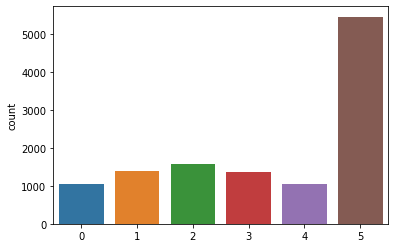

In [11]:
model1 = KMeans(n_clusters=6,n_init = 6 ).fit(reviews)
prediction1 = model1.predict(reviews)
sns.countplot(prediction1)
plt.show()

*TODO: Insert your analysis of the clusters here*

In [12]:
top_features(6,15,model1)

Cluster 0: movie film movies like story watch just good great acting seen did love really time
Cluster 1: software program version product use computer support windows microsoft easy office used new upgrade norton
Cluster 2: album cd music songs quot song like just great band good listen sound best love
Cluster 3: book read books author reading story like quot just written good did great really people
Cluster 4: camera lens pictures canon digital use flash battery quality great case good cameras picture sony
Cluster 5: product great good use just like does hair time did work really bought dvd used


By comparing the number of cluster in the kmeans model, we essentially notice that cluster 3 have effective grouping of text than the cluster 6.

The clusters are product/album, camera/flash/battery, book/storey/author.

## Problem 3: Compare clusterings using the Rand index

In some scenarios, you may have gold-standard class labels available for at least a subset of your documents. In these cases you can compute the **Rand index** of a clustering, and use this measure to compare the quality of different clusterings.

To compute the Rand index, we view a clustering as a binary classifier on (unordered) pairs of documents. The classifier predicts &lsquo;positive&rsquo; if and only if the two documents belong to the same cluster. The (non-normalized) Rand index of the clustering is the accuracy of this classifier relative to a reference in which a document pair belongs to the &lsquo;positive&rsquo; class if and only if the two documents in the pair have the same gold-standard class label.

Compare clusterings with $k \in \{1,3,5,7\}$ clusters. As your evaluation data, use the first 500 documents from the original data set along with their gold-standard categories (from the `category` column). What do you observe? How do you interpret your observations?

In [13]:
from sklearn.metrics.cluster import rand_score
df["category"].unique()
k = [1,3,5,7]

In [14]:
def rand_index_fn (clusters,classes):
  output = []
  for i in range(0,500):         # comparing the classes label of the documnets
    for j in range(i+1,500):
      if (classes[i] == classes[j]):
        if (clusters[i] == clusters[j]):    # same cluster /same classes document to find the true positive 
          output.append(1)
        else:
            output.append(0)                # False positive
      else:
        if (clusters[i] == clusters[j]):    # classes are different / clusters are same
          output.append(0)                  # False negatives 
        else:
            output.append(1)                # true negatives
  return(output)



In [15]:
data = df[:500]
reviews_5 = vectorizer.fit_transform(data["text"])
v=[]
n=[]
for i in k:
  # kmeans model with different clusters
  model2 = KMeans(n_clusters=i,n_init = 6 ).fit(reviews_5)
  prediction2 = model2.predict(reviews_5)
  # using the rand index function
  rand = rand_index_fn(data["category"],prediction2)
  v.append(round(sum(rand)/len(rand),2))
  # using the rand score library
  n.append(round(rand_score(data["category"],prediction2),2))
  


In [16]:
print(n)
print(v)

[0.17, 0.59, 0.77, 0.81]
[0.17, 0.59, 0.77, 0.81]


 The Rand index score of the model is very less when we keep cluster k = 1 and 3 . After increasing the cluster k = 5 and 7, the model is performing well to group the data into a different. so, in this case optimal cluster for this data is 7



## Topic modelling data set

The data set for the topic modelling part of this lab is the collection of all [State of the Union](https://en.wikipedia.org/wiki/State_of_the_Union) addresses from the years 1975–2000. These speeches come as a single text file with one sentence per line. The following code cell prints the first 5 lines from the data file:

In [17]:
with open('/content/sample_data/sotu_1975_2000.txt') as source:
    for i, line in enumerate(source):
        print(line.rstrip())
        if i >= 5:
            break

mr speaker mr vice president members of the 94th congress and distinguished guests
twenty six years ago a freshman congressman a young fellow with lots of idealism who was out to change the world stood before sam rayburn in the well of the house and solemnly swore to the same oath that all of you took yesterday an unforgettable experience and i congratulate you all
two days later that same freshman stood at the back of this great chamber over there someplace as president truman all charged up by his single handed election victory reported as the constitution requires on the state of the union
when the bipartisan applause stopped president truman said i am happy to report to this 81st congress that the state of the union is good our nation is better able than ever before to meet the needs of the american people and to give them their fair chance in the pursuit of happiness it is foremost among the nations of the world in the search for peace
today that freshman member from michigan stan

Take a few minutes to think about what topics you would expect in this data set.

We would emphasize that, the document explains on the political speeches of the party, president work and giving honour to the presendential person.



## Problem 4: Train a topic model

Your first task on the topic modelling data is to train an LDA model. For this task you will be using [spaCy](https://spacy.io/) and the [gensim](https://radimrehurek.com/gensim/) topic modelling library.

Start by preprocessing the data using spaCy. Given that the data set for this problem is rather small, you do not have to exclude any components from the standard pipeline. Filter out stop words, non-alphabetic tokens, and tokens less than 3 characters in length. Store the documents as a nested list where the first level of nesting corresponds to the sentences and the second level corresponds to the tokens in each sentence.

In [18]:
     # TODO: Replace the following lines with your own code for preprocessing the documents
with open('/content/sample_data/sotu_1975_2000.txt') as source:
    documents = [line.split() for line in source]

Test your preprocessing by running the following cell:

In [19]:
' '.join(documents[42])

'first we must reduce oil imports by 1 million barrels per day by the end of this year and by 2 million barrels per day by the end of 1977'

In [20]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [27]:
def preprocess(text):
  # join the every tokens into string
  text = ' '.join(text)
  # tokenization and removing stop words
  token = [t for t in nlp(text) if not t.is_stop] 
  # lemmatization
  lemma = [lem.lemma_ for lem in token]
  # removing the non-alphabetic words
  return [i for i in lemma if i.isalpha()]

In [28]:
d= [] # save the preprocessed documents in a list
for i in range(len(documents)):
  d.append(preprocess(documents[i]))

You should get the following output:

In [29]:
' '.join(d[42])

'reduce oil import million barrel day end year million barrel day end'

In [31]:
len(d)

2898

Once you have the list of documents, skim the section [Pre-process and vectorize the documents](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#pre-process-and-vectorize-the-documents) of the gensim documentation to learn how to create the dictionary and the vectorized corpus representation required by gensim. (Note that you cannot use the standard scikit-learn pipeline in this case.) Then, write code to train an [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html) for $k=10$ topics, and using default values for all other parameters.

In [32]:
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

In [33]:
# Create a corpus from a list of texts
common_dictionary = Dictionary(d)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
common_dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [common_dictionary.doc2bow(text) for text in d]

temp = common_dictionary[0]  # This is only to "load" the dictionary.
id2word = common_dictionary.id2token
# Train the model on the corpus.
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics = 10
)

In [46]:
print(len(common_dictionary))
print(len(corpus))

gensim.corpora.dictionary.Dictionary

Once you have a trained model, run the following cell to print the topics:

In [34]:
model.print_topics()

[(0,
  '0.020*"crime" + 0.018*"people" + 0.017*"americans" + 0.016*"community" + 0.015*"s" + 0.014*"pass" + 0.013*"time" + 0.013*"new" + 0.012*"drug" + 0.012*"year"'),
 (1,
  '0.034*"child" + 0.025*"work" + 0.022*"s" + 0.019*"year" + 0.018*"people" + 0.015*"america" + 0.015*"world" + 0.013*"family" + 0.012*"good" + 0.012*"parent"'),
 (2,
  '0.036*"s" + 0.016*"america" + 0.013*"opportunity" + 0.012*"nuclear" + 0.011*"work" + 0.009*"state" + 0.009*"continue" + 0.008*"weapon" + 0.008*"nation" + 0.008*"new"'),
 (3,
  '0.024*"year" + 0.019*"work" + 0.015*"s" + 0.013*"support" + 0.011*"government" + 0.010*"people" + 0.009*"know" + 0.009*"child" + 0.009*"continue" + 0.009*"nation"'),
 (4,
  '0.028*"government" + 0.026*"new" + 0.021*"s" + 0.014*"technology" + 0.013*"standard" + 0.012*"ve" + 0.011*"science" + 0.010*"nation" + 0.009*"lead" + 0.009*"environment"'),
 (5,
  '0.030*"s" + 0.021*"people" + 0.017*"college" + 0.016*"american" + 0.016*"program" + 0.013*"work" + 0.013*"year" + 0.012*"amer

Inspect the topics. Can you &lsquo;label&rsquo; each topic with a short description of what it is about? Do the topics match your expectations? Summarize your discussion in a short text.

*TODO: Insert your discussion of the topics here*

## Problem 5: Monitor a topic model for convergence

When learning an LDA model, it is important to make sure that the training algorithm has converged to a stable posterior distribution. One way to do so is to plot, after each training epochs (or &lsquo;pass&rsquo;, in gensim parlance) the log likelihood of the training data under the posterior. Your last task in this lab is to create such a plot and, based on this, to suggest an appropriate number of epochs.

To collect information about the posterior likelihood after each pass, we need to enable the logging facilities of gensim. Once this is done, gensim will add various diagnostics to a log file `gensim.log`.

In [35]:
import logging

logging.basicConfig(filename='gensim.log', format='%(asctime)s:%(levelname)s:%(message)s', level=logging.INFO)

The following function will parse the generated logfile and return the list of log likelihoods.

In [36]:
import re
from matplotlib import pyplot as plt

def parse_logfile():
    matcher = re.compile('(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity')
    likelihoods = []
    with open('gensim.log') as source:
        for line in source:
            match = matcher.search(line)
            if match:
                likelihoods.append(float(match.group(1)))
    return likelihoods

Your task now is to re-train your LDA model for 50&nbsp;passes, retrieve the list of log likelihoods, and create a plot from this data.

In [37]:
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics = 10,
    passes = 50
) 

LdaModel(num_terms=721, num_topics=10, decay=0.5, chunksize=2000)


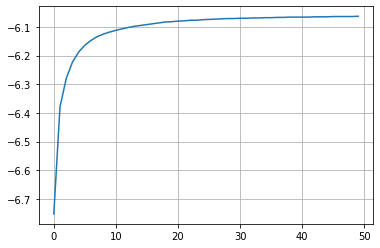

In [40]:
print(model)
llik = parse_logfile()
plt.plot(llik)
plt.grid()

In [48]:
print(np.argmax(llik))
np.max(llik)

49


-6.063

How do you interpret your plot? Based on the plot, what would be a reasonable choice for the number of passes? Retrain your LDA model with that number and re-inspect the topics it finds. Do you consider the new topics to be &lsquo;better&rsquo; than the ones that you got from the 1-pass model in Problem&nbsp;5?

*TODO: Insert your discussion of these questions here*

In [50]:
lda = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    num_topics=10,
    id2word=common_dictionary,
    passes=40   
)


<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>

Reflection questions
The following reflection questions are questions that you could be asked in the oral exam. Try to answer each of them in the form of a short text and enter it in the cell below. You will get feedback on your answers from your lab assistant.

RQ 3.1: Based on your experiments in Problem 2 and Problem 3, what is the relation between the quality of a clustering and the number of clusters? What happens when the number of clusters is too low, or too high? For this particular data set, what would a ‘good’ number of clusters be?

RQ 3.2: Explain why it is important to monitor an LDA model for convergence and not simply use, say, 1000 passes. How is the log likelihood used in this context? Were the topics from the multi-pass model ‘better’ than the topics from the 1-pass model?

RQ 3.3: What are the differences between $k$-means and LDA? When would you use one, when the other?

TODO: 

ANS 3.1 : The relation between the quality of clustering and the number of clusters is as the number of clusters increase the quality if clusters also increases. When the number of clusters is too high, then the quality of cluster is better than when the number of clusters is too low. When the number of clusters is too low then the quality of cluster is poor since all the classes gets identified with those low number of clusters.

For this particular dataset the optimal or "good" number of clusters would be 7


ANS 3.2 : It is important to monitor the LDA model for convergence because of computation cost and time. This also dpends upon the corpus size , if we have a large corpus then we might get away with a few number of passes. The log-likelihood helps us to caluclate the probability of the training data after each pass to determine the optimal number of pass. The topics seems to perform better in multi-pass models


ANS 3.3 : K-means is an hard clustering algorithm which is more suited for trivial clustering/classification tasks where we know for sure that this data point belongs to this cluster. Where as the LDA is a soft Clustering algorithm where we insted of saying that a data point  belongs to this cluster compeletely , we calculate the probability of the data point belonging to differenet clusters. 

Congratulations on finishing L3! 👍